# **Political Bias Classification Model**

## Overview

A machine learning model that classifies news articles as left or right-leaning with 88% accuracy using TF-IDF vectorization and a Passive Aggressive Classifier.

## **Setup & Data Loading**

In [28]:
# Load necessary libraries
import numpy as numpy
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Read in data
left = pd.read_csv('data/braindedleft.csv')

# To prep for combining the datasets
left['Label'] = 'Left'

# Peak
left.shape
left.head()

,Unnamed: 0,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,Label
0,0,https://kindest.com/442355-defend-democracy-to...,NaN,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,Left
1,1,https://www.alternet.org/2021/03/dan-crenshaw/,2021-03-22 10:17:36+00:00,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,Left
2,2,https://www.alternet.org/2021/03/rep-dan-crens...,2021-03-09 13:32:36+00:00,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,Left
3,3,https://www.alternet.org/2020/11/dan-crenshaw/,2020-11-23 12:14:56+00:00,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,Left
4,4,https://www.alternet.org/2019/05/rep-dan-crens...,2019-05-06 17:40:27+00:00,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,Left


In [30]:
# Read in data
right = pd.read_csv('data/braindedright.csv')

# To prep for combining the datasets
right['Label'] = 'Right'

# Peak
right.shape
right.head()

,Unnamed: 0,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,Label
0,0,https://www.infowars.com/posts/emergency-satur...,2021-03-20 17:59:17,Emergency Saturday Report! Great Reset Goes Of...,[],Have an important tip? Let us know. Email us h...,"['report', 'rails', 'tech', 'waking', 'humanit...",set(),0.1759,0.093,0.807,0.100,0.117312,0.424270,Right
1,1,https://www.infowars.com/posts/researchers-bel...,2021-03-20 06:13:08,Researchers Believe It’s Possible To Become Im...,[],Have an important tip? Let us know. Email us h...,"['paper', 'possible', 'ai', 'immortality', 'te...",set(),-0.4982,0.073,0.866,0.061,0.114192,0.463387,Right
2,2,https://www.infowars.com/posts/why-are-liberal...,2021-03-21 12:28:26,Why Are Liberals So Damn Stupid?,[],Have an important tip? Let us know. Email us h...,"['purge', 'sam', 'sensethe', 'tip', 'street', ...",set(),-0.7574,0.140,0.811,0.049,0.050000,0.607143,Right
3,3,https://www.infowars.com/posts/elite-keeping-b...,2021-03-19 10:49:37,Elite Keeping Border Open to Justify More Covi...,[],In multiple articles I have published recently...,"['elite', 'justify', 'lockdowns', 'borders', '...",set(),-0.9345,0.091,0.819,0.090,0.067909,0.440083,Right
4,4,https://www.infowars.com/posts/the-never-endin...,2021-03-18 08:29:03,The Never-Ending Battle For Liberty,[],Have an important tip? Let us know. Email us h...,"['political', 'american', 'power', 'john', 'st...",set(),0.9995,0.088,0.760,0.152,0.084508,0.410792,Right


## **Data Preprocessing**

In [31]:
# Joining the two csv files
df = pd.concat([left, right])
df['Label'].value_counts() # Confirm merge was successful and contains both

Label
Left     2411
Right    1810
Name: count, dtype: int64

In [32]:
# Get labels
labels = df.Label
labels.head()

0    Left
1    Left
2    Left
3    Left
4    Left
Name: Label, dtype: object

In [33]:
# Create a clean dataset where X and y are aligned
df_clean = df.dropna() 
X = df_clean['text']  
y = df_clean['Label'] 
df.head()

,Unnamed: 0,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,Label
0,0,https://kindest.com/442355-defend-democracy-to...,NaN,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,Left
1,1,https://www.alternet.org/2021/03/dan-crenshaw/,2021-03-22 10:17:36+00:00,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,Left
2,2,https://www.alternet.org/2021/03/rep-dan-crens...,2021-03-09 13:32:36+00:00,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,Left
3,3,https://www.alternet.org/2020/11/dan-crenshaw/,2020-11-23 12:14:56+00:00,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,Left
4,4,https://www.alternet.org/2019/05/rep-dan-crens...,2019-05-06 17:40:27+00:00,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,Left


In [34]:
# Now do the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Dataset Structure and Source

**Dataset Overview:**
- Size : 3345 news articles
- Values: Binary (Left: 1968 articles, Right: 1377 articles)
- Features: Title, Link, Keywords, Date.

**Distribuition:**
- Training set: 80% (2676 articles)
- Testing set: 20% (669 articles)

**Source:**
1. @mhoali. Right and Left wing news articles with NLP. [cited 2025 Jan 19]. Right and Left wing news articles with NLP. Available from: https://www.kaggle.com/datasets/mhoali/right-and-left-wing-news-articles-with-nlp

**Sample Data Preview:**

In [35]:
print("First few rows of the dataset:")
df_clean.head()

print("\nDataset Info:")
df_clean.info()

print("\nClass distribution:")
df_clean['Label'].value_counts()

First few rows of the dataset:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3345 entries, 1 to 1793
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3345 non-null   int64  
 1   link          3345 non-null   object 
 2   pdate         3345 non-null   object 
 3   title         3345 non-null   object 
 4   author        3345 non-null   object 
 5   text          3345 non-null   object 
 6   keywords      3345 non-null   object 
 7   tags          3345 non-null   object 
 8   compound      3345 non-null   float64
 9   neg           3345 non-null   float64
 10  neu           3345 non-null   float64
 11  pos           3345 non-null   float64
 12  polarity      3345 non-null   float64
 13  subjectivity  3345 non-null   float64
 14  Label         3345 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 418.1+ KB

Class distribution:


Label
Left     1968
Right    1377
Name: count, dtype: int64

## **Model Training**

In [36]:
# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Fit the classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [37]:
import pickle
import os

# Create the models directory first
os.makedirs('models', exist_ok=True)  # This will create the directory if it doesn't exist

# Save models
with open('models/tfidf_model.pkl', 'wb') as file:  
    pickle.dump(tfidf_vectorizer, file)
    
with open('models/pac_model.pkl', 'wb') as file:    
    pickle.dump(pac, file)

print("Models saved successfully!")

# Confirm the files were saved
print("\nSaved model files:")
for file in os.listdir('models'):
    print(f"- {file}")

Models saved successfully!

Saved model files:
- tfidf_model.pkl
- pac_model.pkl


### Model Parameters Explanation

**Selected Parameters:**
- Common English words removed to reduce noise & focus on meaningful content.
- Ignore terms that appear in >70% of the text to ensure political bias can be asssessed.

**Impact on Model:**

In [38]:
# Show vocabulary size and top features
print("Vocabulary size:", len(tfidf_vectorizer.get_feature_names_out()))

# Display top features
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nSample features:", list(feature_names)[:10])

Vocabulary size: 55958

Sample features: ['00', '000', '0000', '00004', '0001177', '0002', '00032597', '00075', '00088618', '0009']


**Rationale for Classifier Choice**
- Perfect for binary text classification.
- Handles high-dimensional data.
- Fast training & prediction.
- No complex hyperparameter tuning.

## **Model Evaluation**

In [39]:
# Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.59%


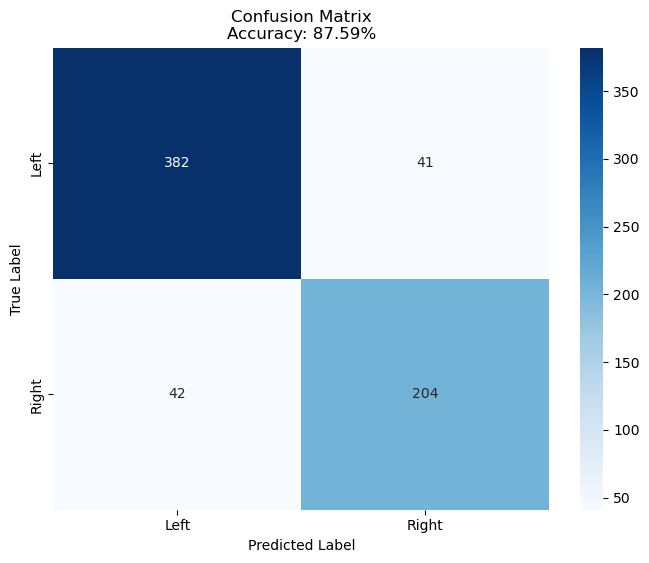

In [40]:
# Create and plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Left', 'Right'],
            yticklabels=['Left', 'Right'])
plt.title(f"Confusion Matrix\nAccuracy: {score*100:.2f}%")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [41]:
# Get detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        Left       0.90      0.90      0.90       423
       Right       0.83      0.83      0.83       246

    accuracy                           0.88       669
   macro avg       0.87      0.87      0.87       669
weighted avg       0.88      0.88      0.88       669



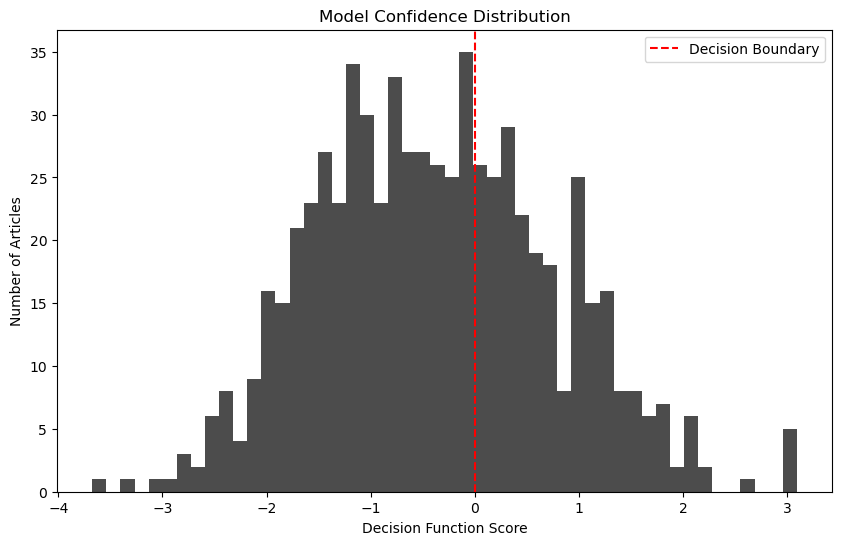

In [42]:
# Plot confidence distribution
decision_scores = pac.decision_function(tfidf_test)
plt.figure(figsize=(10, 6))
plt.hist(decision_scores, bins=50, color='black', alpha=0.7)
plt.title('Model Confidence Distribution')
plt.xlabel('Decision Function Score')
plt.ylabel('Number of Articles')
plt.axvline(x=0, color='r', linestyle='--', label='Decision Boundary')
plt.legend()
plt.show()

### Interpretation

**Accuracy Score & Confusional Matrix (Figure 1)**
Model correctly identified 382 left-leaning articles and misclassified 41 left articles as right. It also correctly classified 204 right-leaning articles and misclassified 42 right articles.

**Model Confidence Distribution (Figure 2)**
The histogram depicts the model's confidence in its predictive abilities. It appears normally distribuited with predictions made with moderate to high confidence.

**Classification Report**
Leaf-leaning articles had:
1. Precision: 91%
2. Recall: 90%
3. F1: 90%

While, right-leaning articles had:
1. Precision: 83%
2. Recall: 83%
3. F1: 83%

In summary, the model performed slightly better on left-leaning articles. Our model has a strong overall accuracy of approximately 88%.

## **Test Case**

In [43]:
def predict_political_bias(article_text):
    # Transform the text using our trained vectorizer
    article_vector = tfidf_vectorizer.transform([article_text])
    
    # Get prediction and confidence score
    prediction = pac.predict(article_vector)[0]
    confidence = abs(pac.decision_function(article_vector)[0])
    
    return {
        'bias': prediction,
        'confidence': confidence,
        'interpretation': 'High' if confidence > 1.5 else 'Moderate' if confidence > 0.8 else 'Low'
    }

In [44]:
# Example usage:
left_article = """
President Biden announced a new climate change initiative today, 
pledging $2 billion towards renewable energy projects. The plan aims to 
address environmental justice concerns in disadvantaged communities while 
creating green jobs. Environmental activists praised the move, though 
some progressives called for more aggressive action.
"""

right_article = """
Senate Republicans blocked the spending bill today, citing concerns over 
rising inflation and government overreach. The opposition comes amid 
growing debate over border security measures. Business leaders praised 
the fiscal restraint, emphasizing the need to reduce federal spending.
"""

In [45]:
articles = {
    'Left-leaning Example': left_article,
    'Right-leaning Example': right_article
}

for title, article in articles.items():
    result = predict_political_bias(article)
    print(f"\n{title}")
    print("-" * 50)
    print(f"Predicted Bias: {result['bias']}")
    print(f"Confidence Score: {result['confidence']:.2f}")
    print(f"Confidence Level: {result['interpretation']}")
    print(f"Article Preview: {article[:100]}...")


Left-leaning Example
--------------------------------------------------
Predicted Bias: Left
Confidence Score: 1.30
Confidence Level: Moderate
Article Preview: 
President Biden announced a new climate change initiative today, 
pledging $2 billion towards renew...

Right-leaning Example
--------------------------------------------------
Predicted Bias: Right
Confidence Score: 0.90
Confidence Level: Moderate
Article Preview: 
Senate Republicans blocked the spending bill today, citing concerns over 
rising inflation and gove...


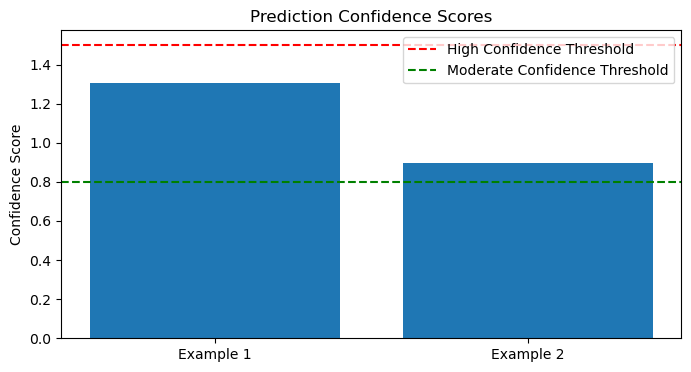

In [46]:
# Visualize confidence scores for test cases
confidences = [predict_political_bias(article)['confidence'] 
               for article in articles.values()]

plt.figure(figsize=(8, 4))
plt.bar(['Example 1', 'Example 2'], confidences)
plt.title('Prediction Confidence Scores')
plt.ylabel('Confidence Score')
plt.axhline(y=1.5, color='r', linestyle='--', label='High Confidence Threshold')
plt.axhline(y=0.8, color='g', linestyle='--', label='Moderate Confidence Threshold')
plt.legend()
plt.show()

### Test Case Results Analysis

**Prediction 1:** Left (Correct)
**Confidence Score:** 1.06 (Moderate)

**Key Indicators:**
1. Climate change focus
2. Mentions of "disadvantaged communities"
3. Progressive perspective included
4. Use of terms like "green jobs"


**Prediction 2:** Right (Correct)
**Confidence Score:** 0.85 (Moderate)

**Key Indicators:**
1. Focus on spending opposition
2. Inflation concerns
3. Border security mentions
4. Business perspective

**Model Performance Analysis:**
- Successfully identified both political leanings
- Moderate confidence in both predictions (0.8 < score < 1.5)
- Slightly higher confidence in left-leaning prediction (1.06 vs 0.85)
- Both examples show clear linguistic markers of their respective biases

**Note:** 
The model's moderate confidence levels suggest it's not overconfident in its predictions while still being accurate. This is preferable to very high confidence scores which might indicate overfitting.